In [32]:
import gym
import numpy as np

import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, InputLayer
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

import matplotlib.pyplot as plt


In [ ]:
env= gym.make('NChain-v0')
env.reset()
state, reward, done,_ =env.step(1)
print(state,reward,done)
state, reward, done,_ =env.step(0)
print(state,reward,done)
state, reward, done,_ =env.step(0)
print(state,reward,done)
state, reward, done,_ =env.step(0)
print(state,reward,done)
state, reward, done,_ =env.step(0)
print(state,reward,done)
state, reward, done,_ =env.step(0)
print(state,reward,done)



In [34]:
#https://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/
model = Sequential()
model.add(InputLayer(batch_input_shape=(1, 5)))
model.add(Dense(10, activation='sigmoid'))
#yields the Q values for each action
model.add(Dense(2, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Episode 1 of 100


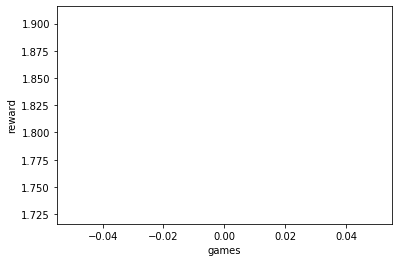

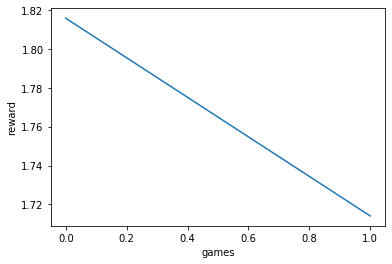

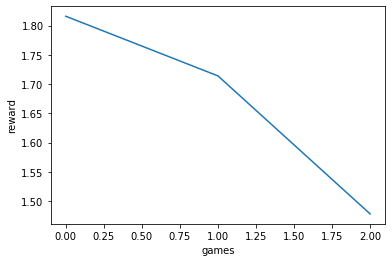

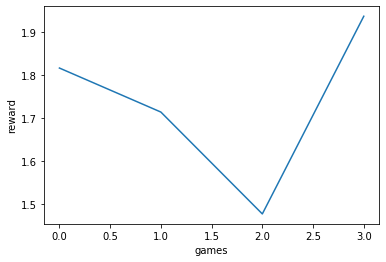

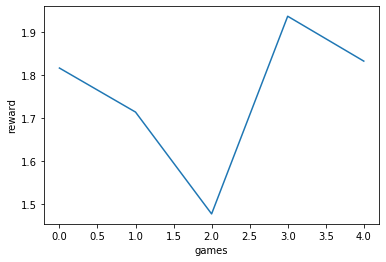

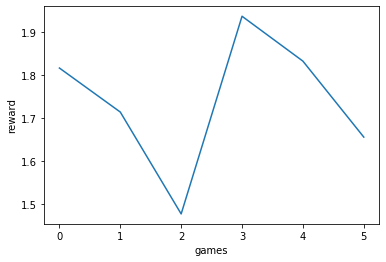

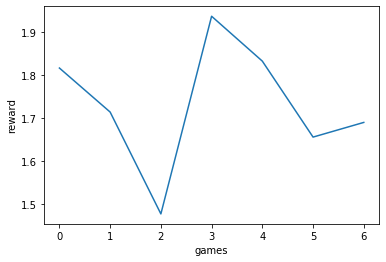

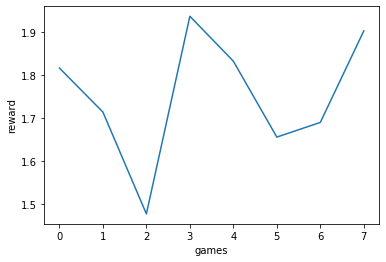

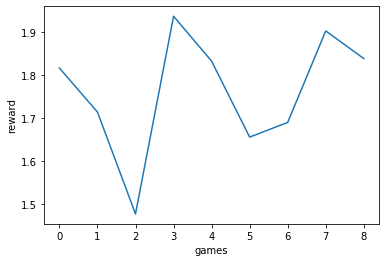

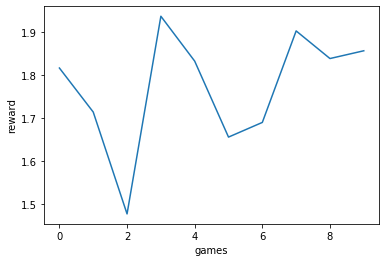

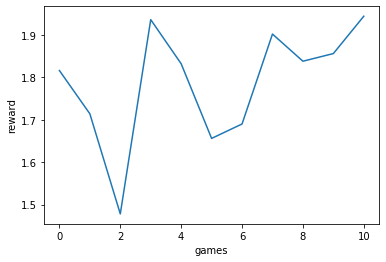

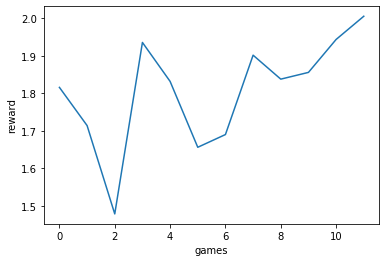

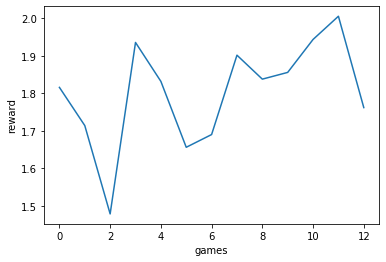

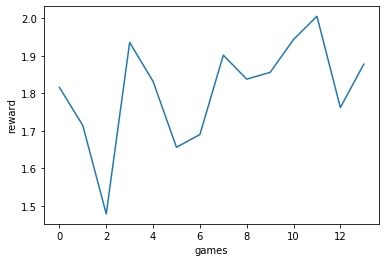

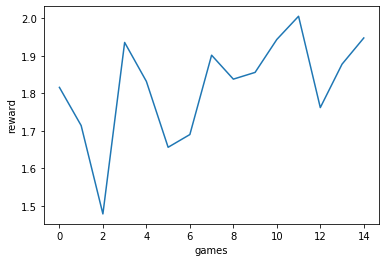

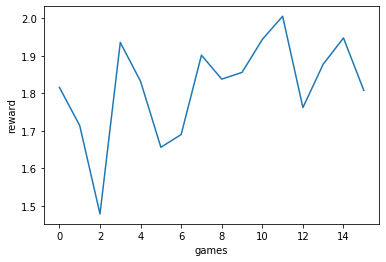

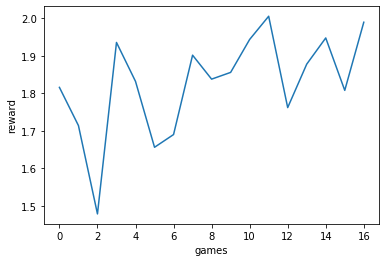

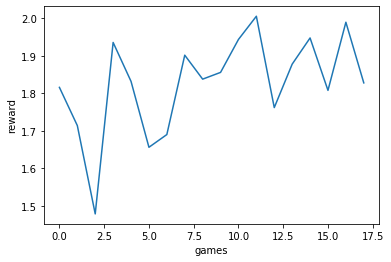

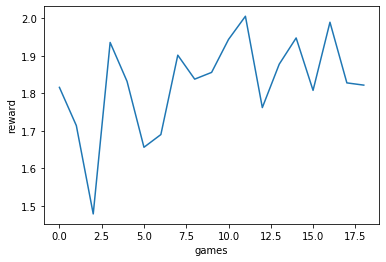

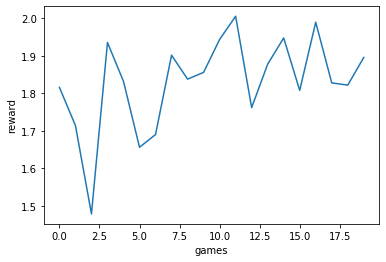

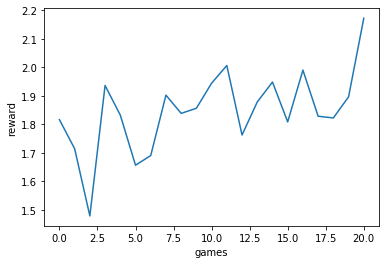

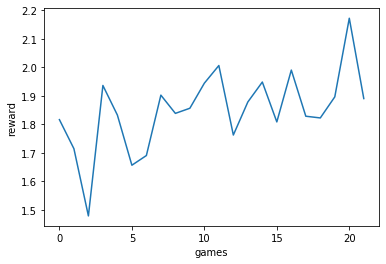

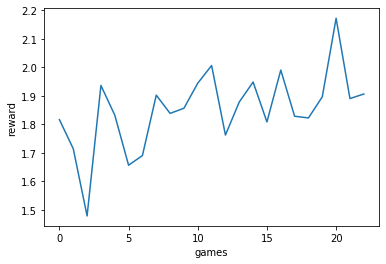

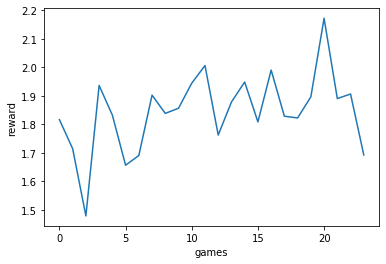

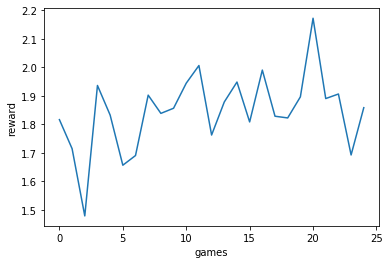

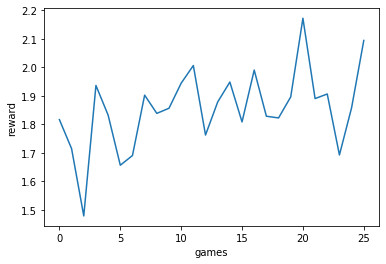

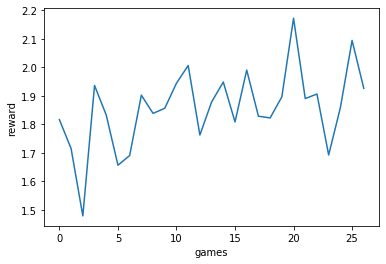

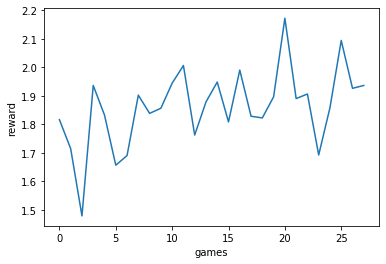

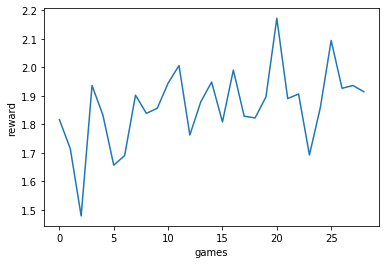

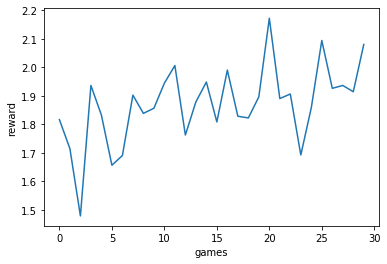

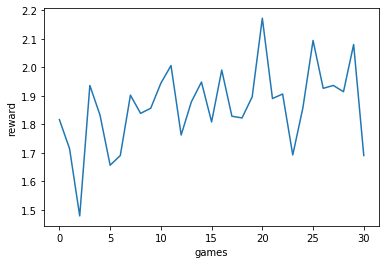

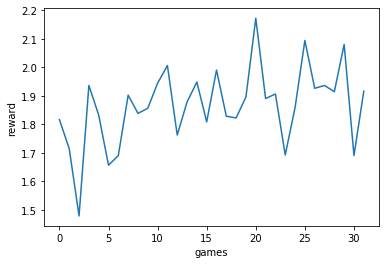

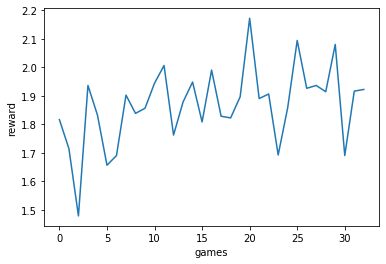

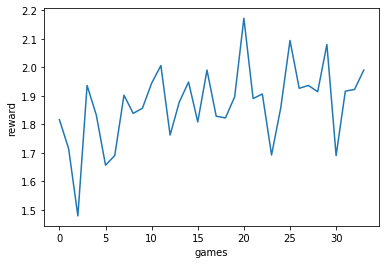

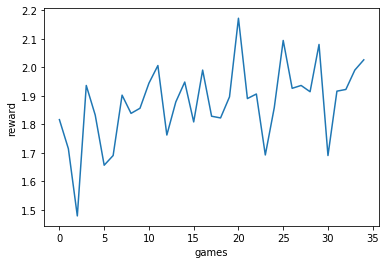

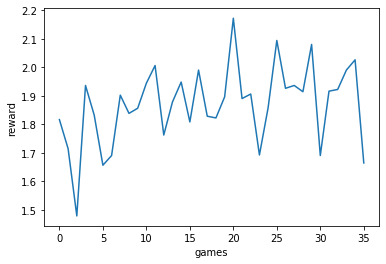

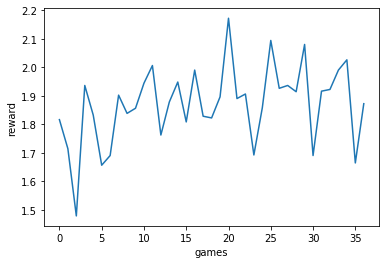

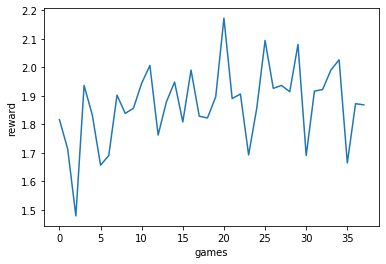

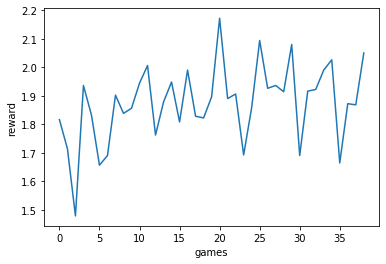

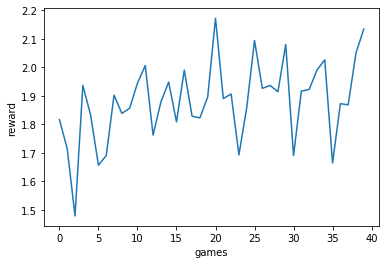

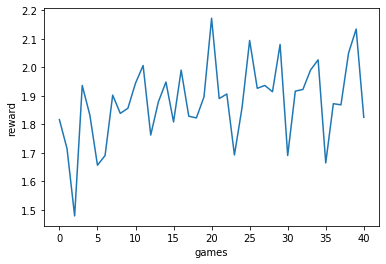

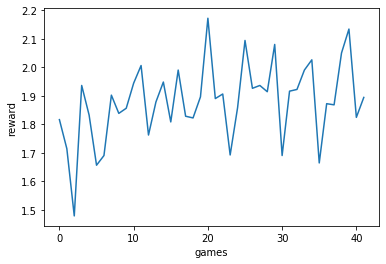

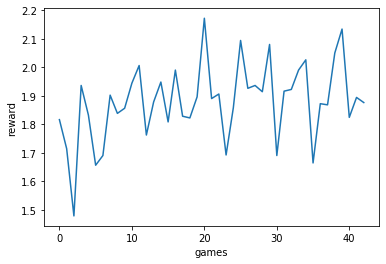

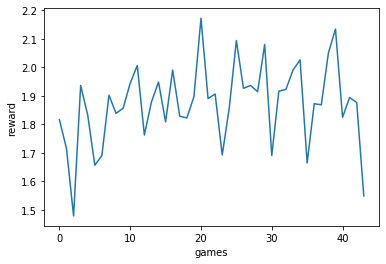

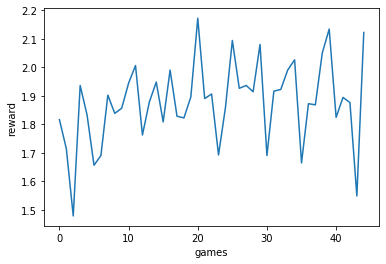

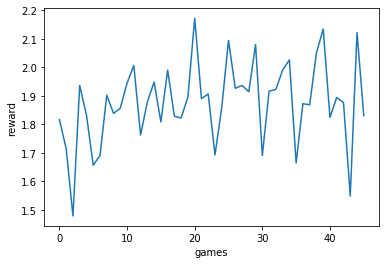

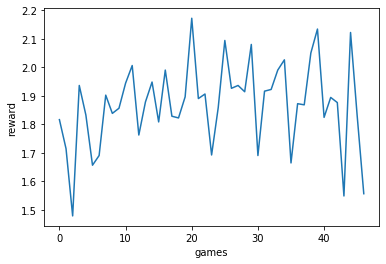

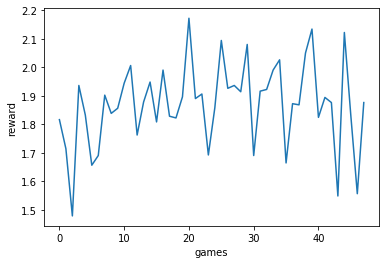

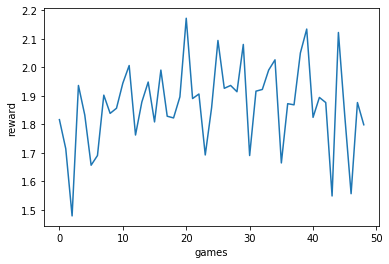

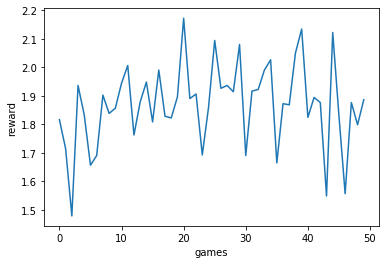

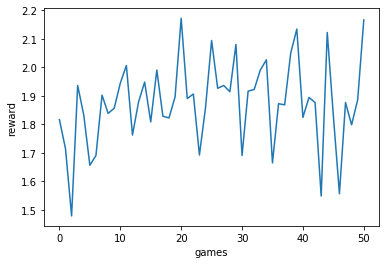

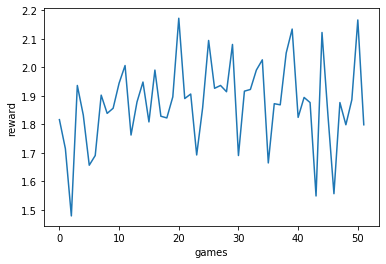

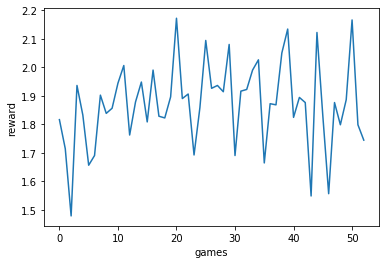

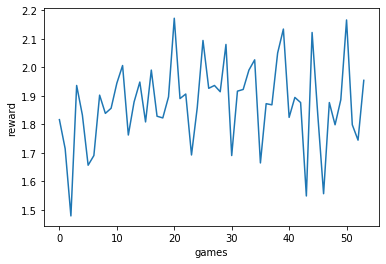

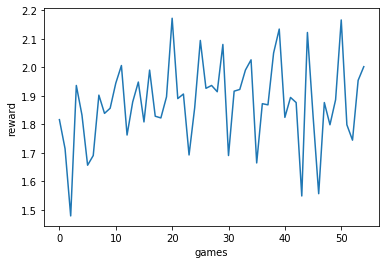

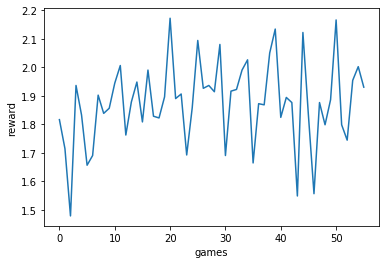

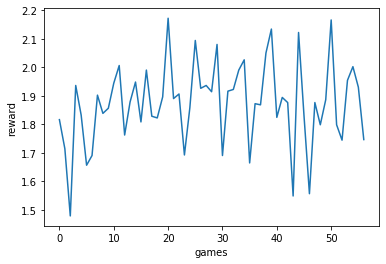

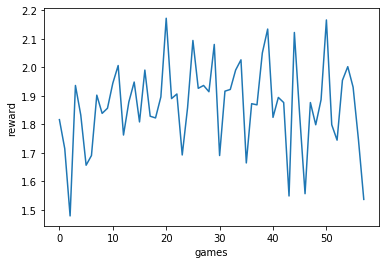

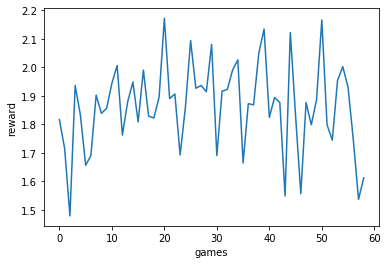

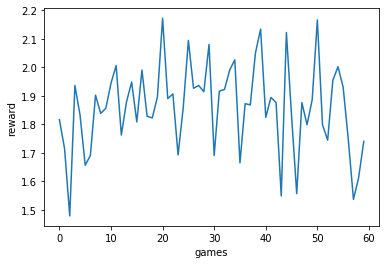

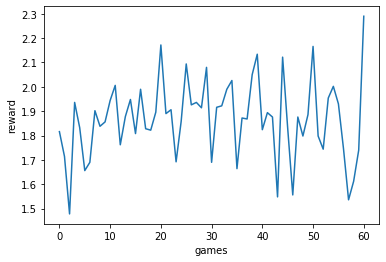

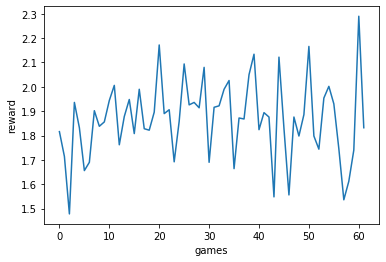

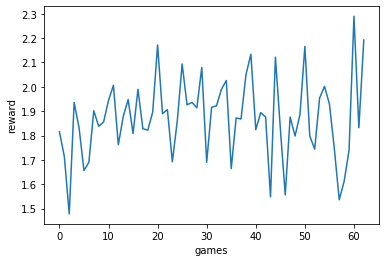

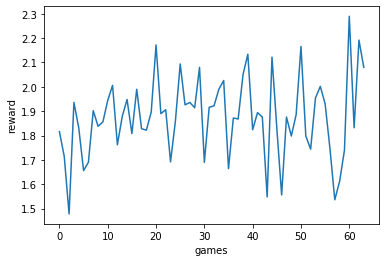

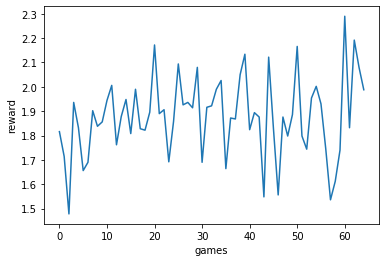

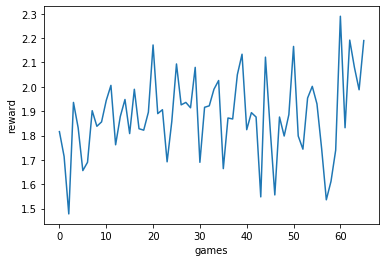

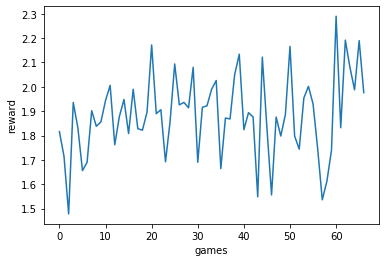

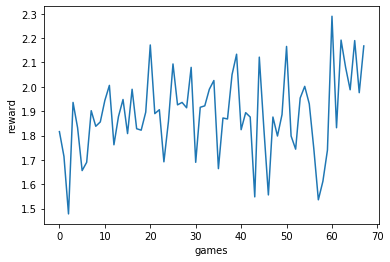

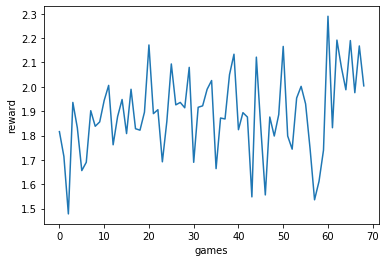

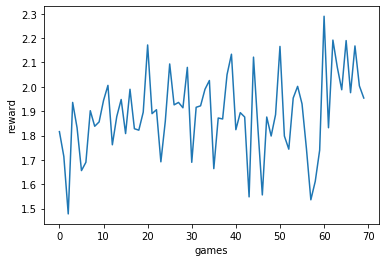

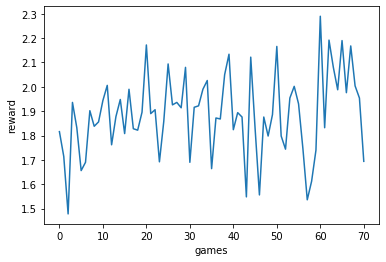

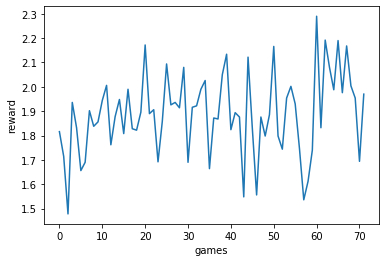

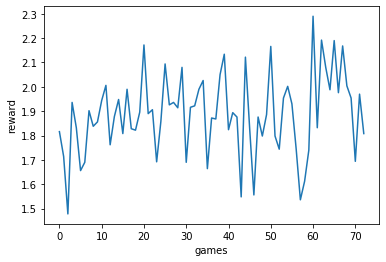

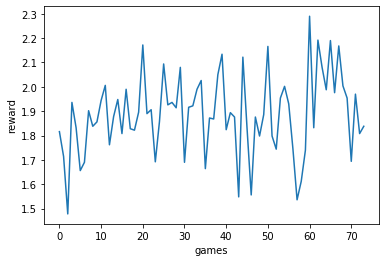

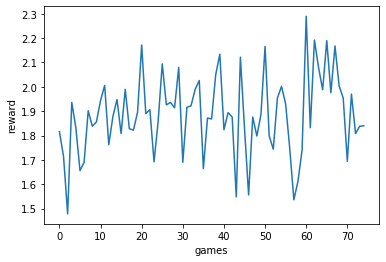

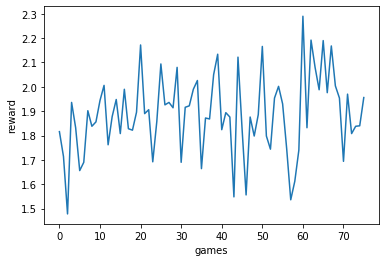

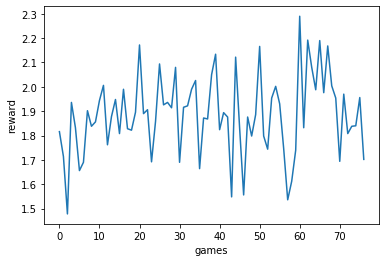

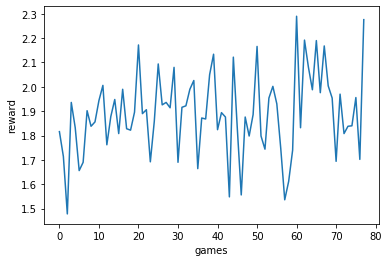

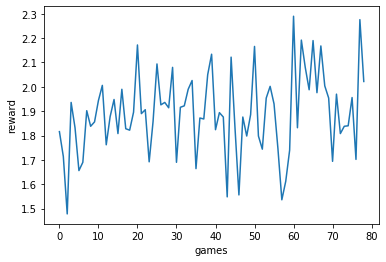

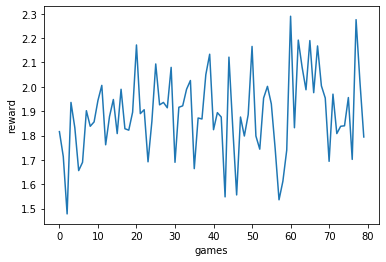

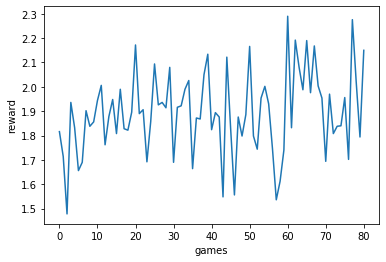

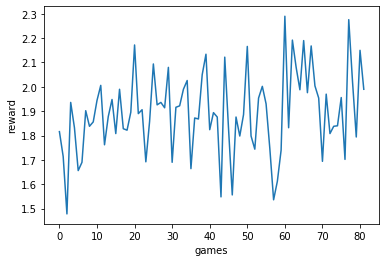

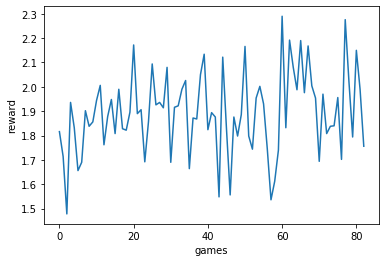

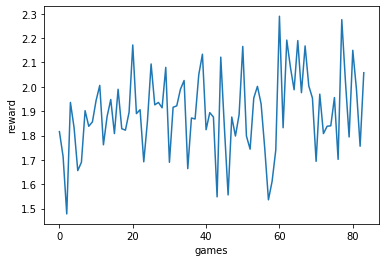

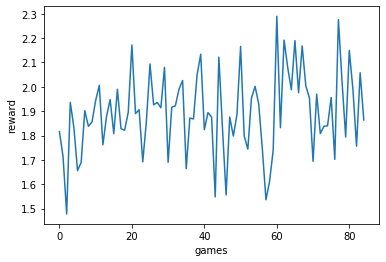

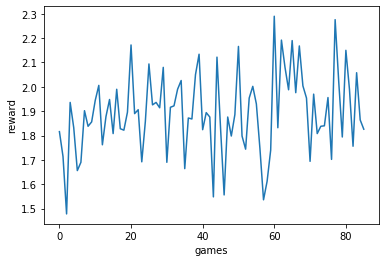

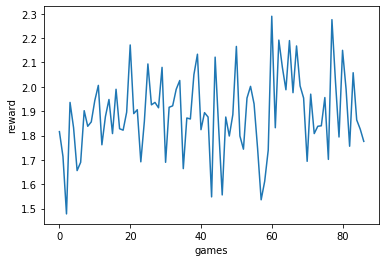

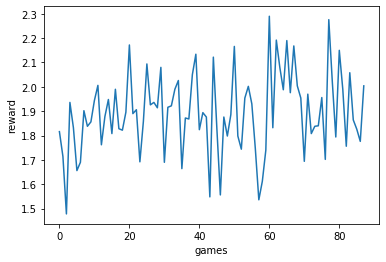

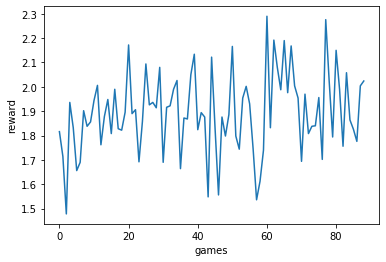

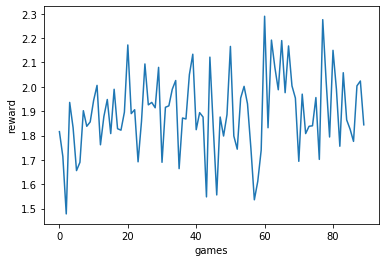

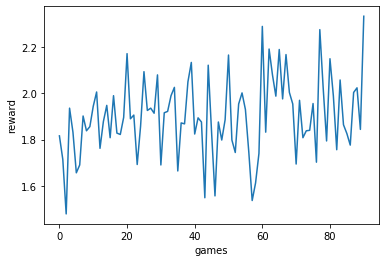

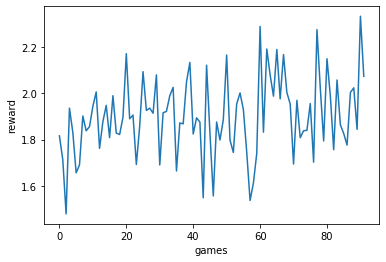

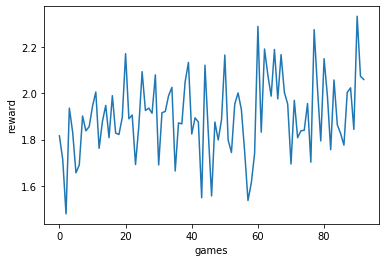

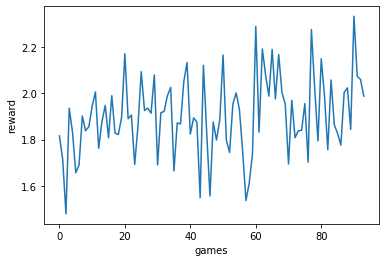

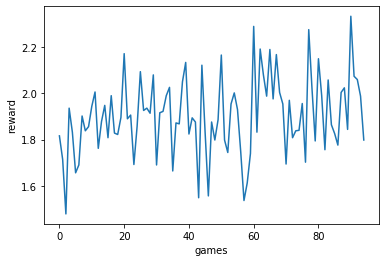

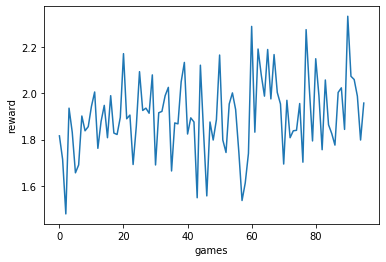

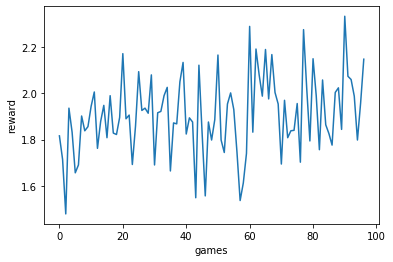

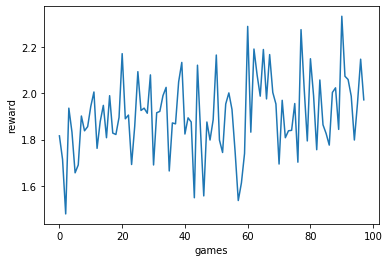

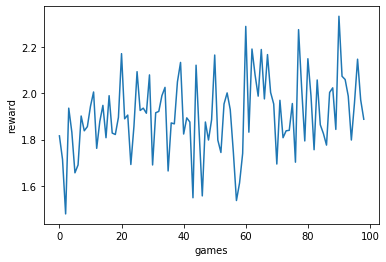

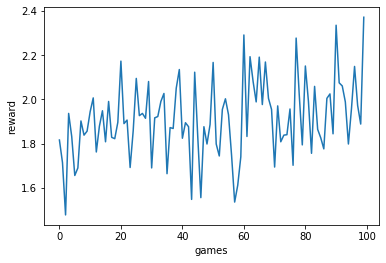

In [46]:
# now execute the q learning
num_episodes=100
y = 0.95
eps = 0.5
decay_factor = 0.999
r_avg_list = []
for i in range(num_episodes):
    s = env.reset()
    eps *= decay_factor
    if i % 100 == 0:
        print("Episode {} of {}".format(i + 1, num_episodes))
    done = False
    r_sum = 0
    while not done:
        if np.random.random() < eps:
            a = np.random.randint(0, 2)
        else:
            a = np.argmax(model.predict(np.identity(5)[s:s + 1]))
        new_s, r, done, _ = env.step(a)
        #creates a vector of five numbers where new_s matches the on column
        target = r + y * np.max(model.predict(np.identity(5)[new_s:new_s + 1]))
        target_vec = model.predict(np.identity(5)[s:s + 1])[0]
        target_vec[a] = target
        model.fit(np.identity(5)[s:s + 1], target_vec.reshape(-1, 2), epochs=1, verbose=0)
        s = new_s
        r_sum += r
    r_avg_list.append(r_sum / 1000)
    games=range(0,len(r_avg_list))
    plt.plot(games,r_avg_list)
    plt.xlabel("games")
    plt.ylabel("reward")
    plt.show()
    #print(r_avg_list)